In [52]:
import json
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import sqlite3
import nltk
import spacy
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import umap
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,log_loss, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import itertools
%matplotlib inline

In [53]:
df_food = pd.read_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/df_food_clean_rev.csv')

In [54]:
df_food['stars'].replace(3,np.nan, inplace =True)
df_food.dropna(inplace=True)
df_food['star_binary'] = np.where(df_food['stars'] <3, 'no', 'yes')


In [55]:
df_food['state_star'] = df_food['state'] + df_food['star_binary']


In [56]:
df_food_v2 = df_food.reset_index(drop=True).drop('Unnamed: 0', axis = 1)

In [57]:
df_food_clean = df_food_v2.copy()

In [58]:
#df_food_clean = df_food_v2.loc[df_food_v2['state_star'].str.contains('no')].reset_index(drop=True)


In [59]:
vectorizer = CountVectorizer(analyzer='word', min_df=200, max_features=25)
Xvec = vectorizer.fit_transform(df_food_clean['food_comb'])
bow_df = pd.DataFrame(Xvec.toarray(), columns=vectorizer.get_feature_names())

In [60]:
vectorizertf = TfidfVectorizer(analyzer='word', min_df=50, max_features=50)
Xvectf = vectorizertf.fit_transform(df_food_clean['food_comb'])
tf_df = pd.DataFrame(Xvectf.toarray(), columns=vectorizertf.get_feature_names())

In [61]:
state_dummies = pd.get_dummies(df_food_clean['state'], drop_first = True)

In [62]:
df_vec = pd.concat([bow_df, state_dummies], axis = 1)

In [63]:
#df_vec = pd.concat([tf_df, state_dummies], axis = 1)

In [64]:
#df_vec = np.array(df_food_clean['stars_avg']).reshape(-1, 1)

In [65]:
X = df_vec
y = df_food_clean['star_binary']

In [66]:
X

,american,asianfusion,bakeries,barbeque,breakfast,brunch,burgers,cafes,chinese,coffee,...,sandwiches,seafood,steakhouses,sushibars,tea,traditional,NC,NV,OH,ON
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2112032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2112033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2112034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
k = 25
if len(X.columns) >= k:
    skb = SelectKBest(k = k, score_func = f_classif)
    best_kfit = skb.fit(X, y)
    X_best_feat = best_kfit.fit_transform(X,y)

    X_best_feat = pd.DataFrame(X_best_feat, columns=X.columns[best_kfit.get_support()])

    best_features = X_best_feat.columns.tolist()
else:
    print('To few columns to select')

In [68]:
# X = df_vec[best_features]
# y = df_food_clean['state']

In [69]:

# df_umap = X[(X != 0).any(axis=1)]
# df_umap = X.loc[:, (X != 0).any(axis=0)]
# df_umap

In [70]:
# up = umap.UMAP(n_neighbors = 20, min_dist = .8, metric = 'euclidean')
# Xumap = up.fit_transform(X)
# sns.scatterplot(Xumap[:, 0], Xumap[:, 1], hue = df_food_clean['star_binary'], s= 10)

In [71]:
le_train = LabelEncoder()
y_le = le_train.fit_transform(y)

In [72]:
y_export = pd.Series(y_le)
X.to_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/C4_rev_X.csv')
y.to_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/C4_rev_y.csv')

In [73]:
y.value_counts()

yes    1603283
no      508753
Name: star_binary, dtype: int64

In [74]:
y_state_dict= pd.concat([pd.DataFrame(y_le), pd.DataFrame(y)], axis = 1).groupby('star_binary')[0].mean()

In [75]:
y_state_dict_swap = {value:key for key, value in y_state_dict.items()}


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y_le, stratify = y_le, random_state = 42)

In [77]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
X_test_rus, y_test_rus = rus.fit_sample(X_test, y_test)


In [78]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test_rus)

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class= 'ovr', solver = 'lbfgs', penalty = 'l2', max_iter = 1000)
lr.fit(X_train_scaled, y_train_rus)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [80]:
y_test_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)

In [81]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=None):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    
   

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize=10)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",fontsize=10)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [82]:

print('LR1 confusion matrix')
#lr1train = confusion_matrix(y_train, y_pred_train, normalize= None)
lr1test = confusion_matrix(y_test_rus, y_test_pred, normalize = None)
test = pd.DataFrame(lr1test).rename(columns = y_state_dict_swap, index = y_state_dict_swap)

LR1 confusion matrix


In [83]:
print('Test macro average recall score is ',recall_score(y_test_rus, y_test_pred, average = 'macro'))
print('Train macro average recall score is ',recall_score(y_train_rus, y_train_pred, average = 'macro'))

Test macro average recall score is  0.5569118155800861
Train macro average recall score is  0.5576101057486929


In [84]:
print('Test accuracy score is ',accuracy_score(y_test_rus, y_test_pred))
print('Train accuracy score is ',accuracy_score(y_train_rus, y_train_pred))

Test accuracy score is  0.5569118155800862
Train accuracy score is  0.5576101057486929


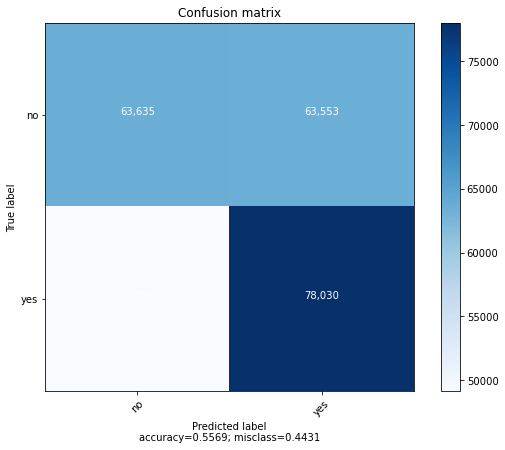

In [85]:
labels = list(y_state_dict_swap.values())
target_names = labels 
plot_confusion_matrix(lr1test,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=None)

In [86]:
recall_score(y_test_rus, y_test_pred, average = 'macro')/(1/lr1test.shape[0])

1.1138236311601721

In [87]:
# knn1 = KNeighborsClassifier(n_neighbors=15, weights='uniform', leaf_size=20)
# knn1.fit(X_train_scaled, y_train_rus)

# y_test_predknn1 = knn1.predict(X_test_scaled)
# y_train_predknn1 = knn1.predict(X_train_scaled)
# print('Test macro average recall score is ',recall_score(y_test_rus, y_test_predknn1,average = 'macro'))
# print('Train macro average recall score is ',recall_score(y_train_rus, y_train_predknn1,average = 'macro'))

In [88]:
# print('Test accuracy score is ',accuracy_score(y_test_rus, y_test_predknn1))
# print('Train accuracy score is ',accuracy_score(y_train_rus, y_train_predknn1))

In [89]:
# knntest = confusion_matrix(y_test_rus, y_test_pred, normalize = None)
# pd.DataFrame(knntest).rename(columns = y_state_dict_swap)

In [90]:
# labels = list(y_state_dict_swap.values())
# target_names = labels 
# plot_confusion_matrix(knntest,
#                           target_names,
#                           title='Confusion matrix',
#                           cmap=None,
#                           normalize=None)

In [91]:
rf = RandomForestClassifier(max_depth = 8)
rf.fit(X_train_scaled, y_train_rus)
y_test_predrf = rf.predict(X_test_scaled)
y_train_predrf = rf.predict(X_train_scaled)



In [92]:
print('Test macro average recall score is ',recall_score(y_test_rus, y_test_predrf,average = 'macro'))
print('Train macro average recall score is ',recall_score(y_train_rus, y_train_predrf,average = 'macro'))

Test macro average recall score is  0.5744881592603075
Train macro average recall score is  0.5755716588261502


In [93]:
rftest = confusion_matrix(y_test_rus, y_test_predrf, normalize = None)
dfrf = pd.DataFrame(rftest).rename(columns = y_state_dict_swap)

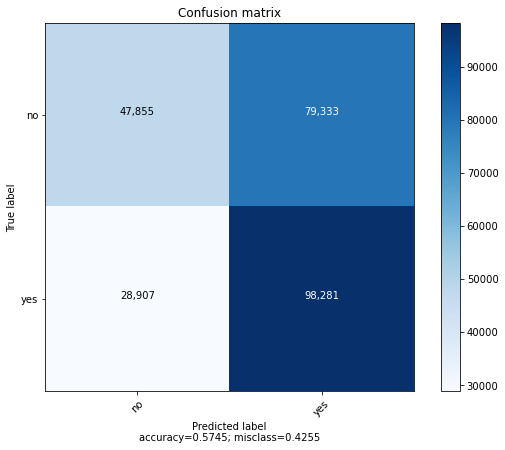

In [94]:
labels = list(y_state_dict_swap.values())
target_names = labels 
plot_confusion_matrix(rftest,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=None)

In [95]:
recall_score(y_test_rus, y_test_predrf, average = 'macro')/(1/rftest.shape[0])

1.148976318520615

In [ ]:

params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'deviance', 
          'learning_rate':0.08, 
          'subsample':.62, 
          'min_samples_split':.02}

# Initialize and fit the model.
gbc = GradientBoostingClassifier(**params)
gbc.fit(X_train_scaled, y_train_rus)

y_test_predgb = gbc.predict(X_test_scaled)
y_train_predgb = gbc.predict(X_train_scaled)

In [ ]:
gbtest = confusion_matrix(y_test_rus, y_test_predgb)
plot_confusion_matrix(gbtest,target_names,False)

In [ ]:
recall_score(y_test_rus, y_test_predgb, average = 'macro')/(1/gbtest.shape[0])

In [ ]:
feature_importance = gbc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize = (14,14))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()